In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from astropy.table import Table
from astropy.io import ascii
from astropy.io import fits

from astropy.coordinates import SkyCoord
from astropy import units

In [2]:
## Path and file of some WISE W4 data
path =   '/cos_pc19a_npr/data/SDSS/DR14Q/'
filename = 'DR14Q_pruned.csv'
datafile= path+filename

In [48]:
df = pd.read_csv(datafile)

In [4]:
df.columns

Index(['SDSS_NAME', 'RA', 'DEC', 'THING_ID', 'PLATE', 'MJD', 'FIBERID',
       'SPECTRO', 'Z', 'SOURCE_Z', 'Z_VI', 'Z_PIPE', 'Z_PIPE_ERR', 'ZWARNING',
       'Z_PCA', 'Z_PCA_ERR', 'Z_CIV_ERR', 'Z_CIII_ERR', 'Z_MGII', 'Z_MGII_ERR',
       'BOSS_TARGET1', 'ANCILLARY_TARGET1', 'ANCILLARY_TARGET2',
       'EBOSS_TARGET0', 'EBOSS_TARGET1', 'EBOSS_TARGET2', 'N_SPEC_SDSS',
       'N_SPEC_BOSS', 'N_SPEC', 'PLATE_DUPLICATE', 'MJD_DUPLICATE',
       'FIBERID_DUPLICATE', 'SPECTRO_DUPLICATE', 'BHWHM_CIV', 'RHWHM_CIV',
       'AMP_CIV', 'REWE_CIV', 'ERR_REWE_CIV', 'FWHM_CIII', 'BHWHM_CIII',
       'RHWHM_CIII', 'AMP_CIII', 'REWE_CIII', 'ERR_REWE_CIII', 'FWHM_MGII',
       'BHWHM_MGII', 'RHWHM_MGII', 'AMP_MGII', 'REWE_MGII', 'ERR_REWE_MGII',
       'FWHM_HB', 'BHWHM_HB', 'RHWHM_HB', 'AMP_HB', 'REWE_HB', 'ERR_REWE_HB',
       'FWHM_OIII4960', 'BHWHM_OIII4960', 'RHWHM_OIII4960', 'AMP_OIII4960',
       'REWE_OIII4960', 'ERR_REWE_OIII4960', 'FWHM_OIII5009', 'BHWHM_OIII5009',
       'RHWHM_OIII5009', 'AM

In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [6]:
singles   = df[df["N_SPEC"] <2]
doubles   = df[df["N_SPEC"] ==2]
multiples = df[df["N_SPEC"] >2]
repeats   = df[df["N_SPEC"] >1]

In [7]:
print('No. of objects with:: '),
print('         a single spectra in the DR14Q is ', len(singles))
print('    more than one spectra in the DR14Q is ', len(repeats))
print('           double spectra in the DR14Q is ', len(doubles))
print('         multiple spectra in the DR14Q is ', len(multiples))

No. of objects with:: 
         a single spectra in the DR14Q is  515507
    more than one spectra in the DR14Q is  7943
           double spectra in the DR14Q is  5404
         multiple spectra in the DR14Q is  2539


In [22]:
#print(multiples['N_SPEC'], multiples['MJD_DUPLICATE'])
for index, row in multiples.iterrows():
    print(row['MJD_DUPLICATE'])

(0, 56279, 0, 56539, 0, 56957, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)
(0, 56243, 0, 56543, 0, 57328, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)
(0, 52262, 0, 55447, 0, 57011, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)
(0, 52262, 0, 55443, 0, 57006, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)
(0, 52525, 0, 55443, 0, 57011, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

(0, 51821, 0, 56575, 0, 56599, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)
(0, 56238, 0, 56267, 0, 56577, 0, 57030, 0, 57039, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)
(0, 56575, 0, 56599, 0, 57030, 0, 57039, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)
(0, 56238, 0, 56577, 0, 56605, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)
(0, 52591, 0, 56575, 0, 56599, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

(0, 56426, 0, 56660, 0, 56664, 0, 56717, 0, 56745, 0, 57038, 0, 57050, 0, 57067, 0, 57127, 0, 57135, 0, 57159, 0, 57166, 0, 56683, 0, 56686, 0, 56697, 0, 56715, 0, 56720, 0, 56739, 0, 56747, 0, 56749, 0, 56751, 0, 56755, 0, 56768, 0, 56772, 0, 56780, 0)
(0, 56448, 0, 56660, 0, 56664, 0, 56717, 0, 56745, 0, 57038, 0, 57050, 0, 57067, 0, 57127, 0, 57135, 0, 57159, 0, 57166, 0, 56683, 0, 56686, 0, 56697, 0, 56715, 0, 56720, 0, 56722, 0, 56739, 0, 56747, 0, 56749, 0, 56751, 0, 56755, 0, 56768, 0, 56772, 0)
(0, 56660, 0, 56664, 0, 56717, 0, 56745, 0, 57038, 0, 57050, 0, 57067, 0, 57127, 0, 57135, 0, 57159, 0, 57166, 0, 56683, 0, 56686, 0, 56697, 0, 56715, 0, 56720, 0, 56722, 0, 56739, 0, 56747, 0, 56749, 0, 56751, 0, 56755, 0, 56768, 0, 56772, 0, 56780, 0)
(0, 56660, 0, 56664, 0, 56717, 0, 56745, 0, 57038, 0, 57050, 0, 57067, 0, 57127, 0, 57135, 0, 57159, 0, 57166, 0, 56683, 0, 56686, 0, 56697, 0, 56715, 0, 56720, 0, 56722, 0, 56739, 0, 56747, 0, 56749, 0, 56751, 0, 56755, 0, 56768, 0, 5677

In [12]:
print(type(multiples['N_SPEC']))
print(type(multiples['MJD_DUPLICATE']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


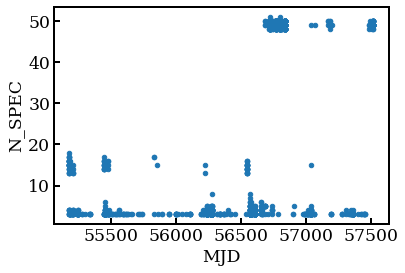

In [24]:
multiples.plot.scatter(x='MJD', y='N_SPEC')
plt.show()

In [26]:
#multiples.plot.scatter(x='MJD', y='MJD_DUPLICATE')
#plt.show()

In [36]:
mjds = np.array(multiples['MJD_DUPLICATE'])
print(type(mjds))

<class 'numpy.ndarray'>


In [57]:
#plt.plot(mjds)
print((mjds[0]))

(0, 56279, 0, 56539, 0, 56957, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)


In [41]:
b = mjds.astype(float)

ValueError: could not convert string to float: '(0, 56272, 0, 56274, 0, 56956, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)'

In [50]:
for i in range(len(mjds)):
    mjds[i] = [float(x) for x in mjds[i]]

ValueError: could not convert string to float: '('

In [55]:
print(type(df))
print(type(df['MJD_DUPLICATE']))
print(df['MJD_DUPLICATE'])

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
0         (0, 56238, -1, -1, -1, -1, -1, -1, -1, -1, -1,...
1         (-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
2         (0, 56269, -1, -1, -1, -1, -1, -1, -1, -1, -1,...
3         (-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
4         (-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
5         (-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
6         (-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
7         (0, 56274, 0, 56957, -1, -1, -1, -1, -1, -1, -...
8         (-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
9         (-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
10        (-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
11        (0, 56566, -1, -1, -1, -1, -1, -1, -1, -1, -1,...
12        (-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
13        (-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
14        (-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
15        (-1, -1, -1, -1,

In [56]:
#df = df.astype(float)
#df.dtypes